We might be on the verge of having too many screens around us. It seems like every day, new versions of common objects are “re-invented” with built-in wifi and bright touchscreens. A promising antidote to our screen addiction is voice interfaces.

In [107]:
!pip install librosa

In [1]:
import os

import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import warnings

warnings.filterwarnings("ignore")

In [2]:
path='C:/Users/Divnoor Singh/OneDrive/Desktop/python'
os.listdir(path)

['.ipynb_checkpoints',
 'Advertising.csv',
 'face_recognition.ipynb',
 'House-Price_model.ipynb',
 'house_prices.csv',
 'Housing_Price_model.ipynb',
 'images',
 'Linear_Regression.ipynb',
 'login_system.ipynb',
 'people.jpg',
 'speech recognition',
 'test.csv',
 'train.csv']

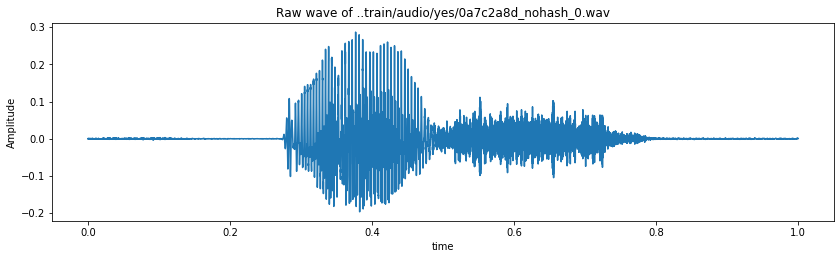

In [3]:
train_audio = os.path.join(path,"speech recognition/train/audio")
samples, sample_rate = librosa.load(train_audio + '/yes/0a7c2a8d_nohash_0.wav', sr = 16000)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '..train/audio/yes/0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

In [4]:
#Sampling Rate
ipd.Audio(samples, rate=sample_rate)

In [5]:
print(sample_rate)

16000


In [6]:
labels=os.listdir(train_audio)

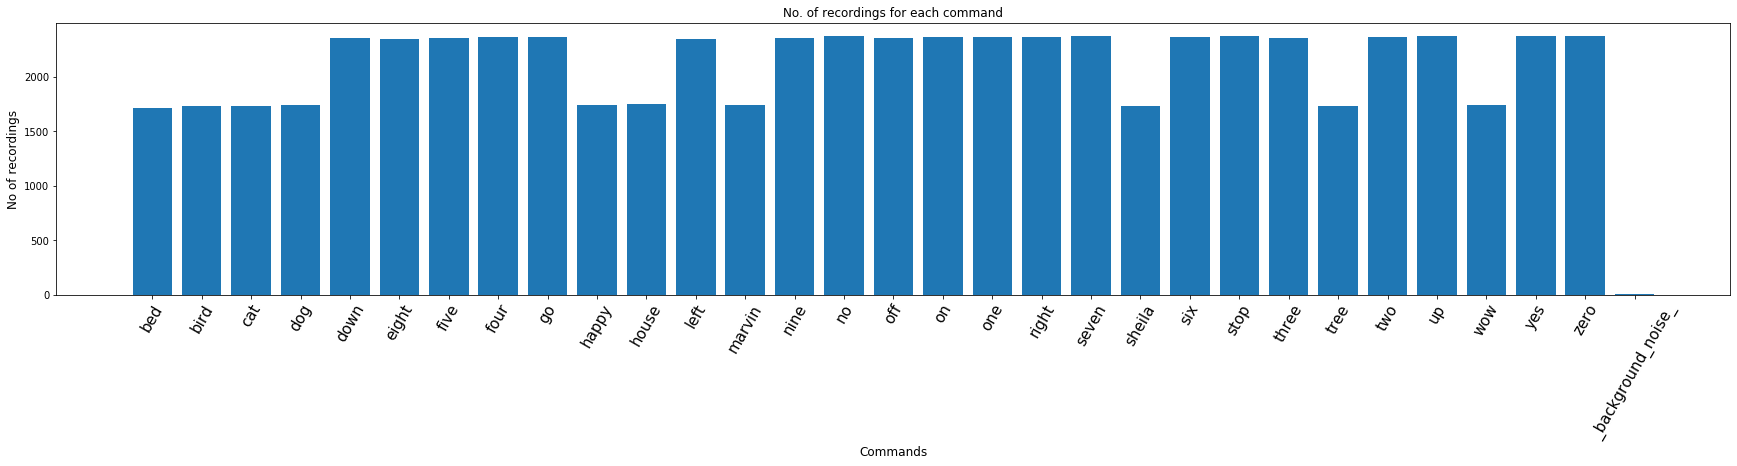

In [7]:
#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

In [83]:
labels=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]

(array([3.00e+00, 4.00e+00, 2.90e+01, 2.70e+01, 6.10e+01, 9.30e+01,
        1.41e+02, 1.08e+02, 2.00e+02, 8.84e+03]),
 array([0.3715625 , 0.43440625, 0.49725   , 0.56009375, 0.6229375 ,
        0.68578125, 0.748625  , 0.81146875, 0.8743125 , 0.93715625,
        1.        ]),
 <a list of 10 Patch objects>)

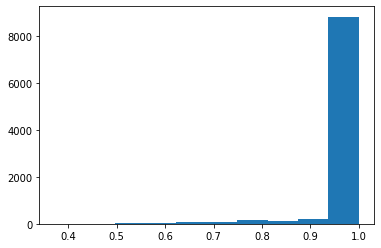

In [84]:
duration_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings))

In [10]:
all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

yes
no
up
down
left
right
on
off
stop
go


In [11]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [13]:
!pip install tensorflow==2.0.0

  Found existing installation: tensorboard 2.1.0
    Uninstalling tensorboard-2.1.0:
      Successfully uninstalled tensorboard-2.1.0
  Found existing installation: tensorflow-estimator 2.1.0
    Uninstalling tensorflow-estimator-2.1.0:
      Successfully uninstalled tensorflow-estimator-2.1.0
  Found existing installation: tensorflow 2.1.0
    Uninstalling tensorflow-2.1.0:
      Successfully uninstalled tensorflow-2.1.0


In [14]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))

Using TensorFlow backend.


In [15]:
all_wave = np.array(all_wave).reshape(-1,8000,1)

In [16]:
#splitting into train & validation sets
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

In [17]:
#model building
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 8000, 1)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2662, 8)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2662, 8)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 884, 16)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 884, 16)           0   

In [18]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
history=model.fit(x_tr, y_tr ,epochs=100, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val))

Train on 17049 samples, validate on 4263 samples
Epoch 1/100
17049/17049 [==============================] - 140s 8ms/step - loss: 2.0040 - accuracy: 0.2431 - val_loss: 1.6132 - val_accuracy: 0.4175
Epoch 2/100
17049/17049 [==============================] - 140s 8ms/step - loss: 1.4603 - accuracy: 0.4583 - val_loss: 1.1835 - val_accuracy: 0.5925
Epoch 3/100
17049/17049 [==============================] - 136s 8ms/step - loss: 1.2431 - accuracy: 0.5489 - val_loss: 1.1689 - val_accuracy: 0.5993
Epoch 4/100
17049/17049 [==============================] - 135s 8ms/step - loss: 1.0978 - accuracy: 0.6132 - val_loss: 0.9785 - val_accuracy: 0.6702
Epoch 5/100
17049/17049 [==============================] - 138s 8ms/step - loss: 0.9955 - accuracy: 0.6491 - val_loss: 0.9615 - val_accuracy: 0.6739
Epoch 6/100
17049/17049 [==============================] - 140s 8ms/step - loss: 0.9286 - accuracy: 0.6781 - val_loss: 0.8630 - val_accuracy: 0.7096
Epoch 7/100
17049/17049 [==============================] 

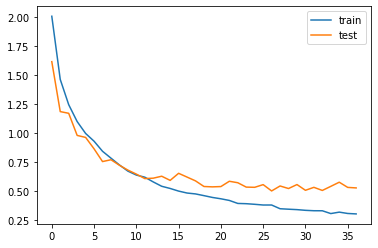

In [21]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [30]:
print(os.getcwd())

C:\Users\Divnoor Singh\OneDrive\Desktop\python\speech recognition


In [31]:
#loading best model
from keras.models import load_model
model=load_model('best_model.hdf5')

OSError: Unable to open file (unable to open file: name = 'best_model.hdf5', errno = 13, error message = 'Permission denied', flags = 0, o_flags = 0)

In [32]:
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

In [85]:
#prediction

import random
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:",classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)

Audio: up


In [86]:
print("Text:",predict(samples))

Text: up


In [37]:
!pip install sounddevice

In [102]:
#Record your own voice commands and test it on the model
import sounddevice as sd
import soundfile as sf

samplerate = 16000  
duration = 1 # seconds
filename = 'yes.wav'
print("start")
mydata = sd.rec(int(samplerate * duration), samplerate=samplerate,
    channels=1, blocking=True)
print("end")
sd.wait()
sf.write(filename, mydata, samplerate)

start
end


In [103]:
#read the saved voice command and convert it to text:
#os.listdir(os.path.join(path,"speech recognition/"))

In [104]:
filepath=os.path.join(path,"speech recognition")

In [105]:
#reading the voice commands
samples, sample_rate = librosa.load(filepath + '/' + 'yes.wav', sr = 16000)
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples,rate=8000)

In [106]:
#converting voice commands to text
predict(samples)

'down'